### All code below was used to create the Data class

In [150]:
from scipy.optimize import curve_fit
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

def sigmoid(x, L ,x0, k, b):
    #x input data
    # L scales output from [0,L]
    # x0 is the midpoint
    # k scales the input
    # b is the offset of output to [b,L+b]
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

def toyData(function = sigmoid, k = 1, x0 = 0, L = 1, b = 0, mu = 0, std = 0.05):
    

    x = np.linspace(-10, 10, 100)  # 100 linearly spaced numbers from -10 to 10
    noise = np.random.normal(mu, std, x.shape)
    x_noisy = x + noise

    y = function(x_noisy, L ,x0, k, b)
    y_noisy = y + noise
     
    return(x_noisy,y_noisy)

def fitCurve(x, y, function = sigmoid):
    p0 = [max(y), np.median(x),1,min(y)] # this is an mandatory initial guess
    popt, pcov = curve_fit(function, x, y,p0, maxfev=10000,method='dogbox')
    fit_y = sigmoid(x, *popt)

    return(fit_y, popt)



x,y_noisy = toyData()
fit_y, params = fitCurve(x, y_noisy)

In [6]:
plt.scatter(x_noisy, y_noisy, label='Noisy data')
plt.plot(x, y, 'k-', label='Orginal')
plt.plot(x, fit_y, 'r-', label='Fitted')
plt.title('Sample Sigmoid Curve with Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


NameError: name 'x_noisy' is not defined

In [7]:
def electrodePlot():
    all_params = []
    fig, axs = plt.subplots(4,4, figsize= (15,15))
    for i in range(16):
        row = i // 4  # Calculate the row index
        col = i % 4   # Calculate the column index
        x, y_noisy = toyData(mu = np.random.rand(),std = 0.2)
        fit_y, params = fitCurve(x, y_noisy)
        all_params.append(params)
        axs[row, col].scatter(x, y_noisy, label='Noisy data')
        axs[row, col].plot(x, fit_y, 'r-', label='Fitted')
        axs[row, col].set_xlabel('x')
        axs[row, col].set_ylabel('y')
        axs[row, col].set_title('Electrode ' + str(i))
    plt.tight_layout()
    plt.show()
    df = pd.DataFrame(all_params, columns = ['L','x0','k','b'])
    return(df)

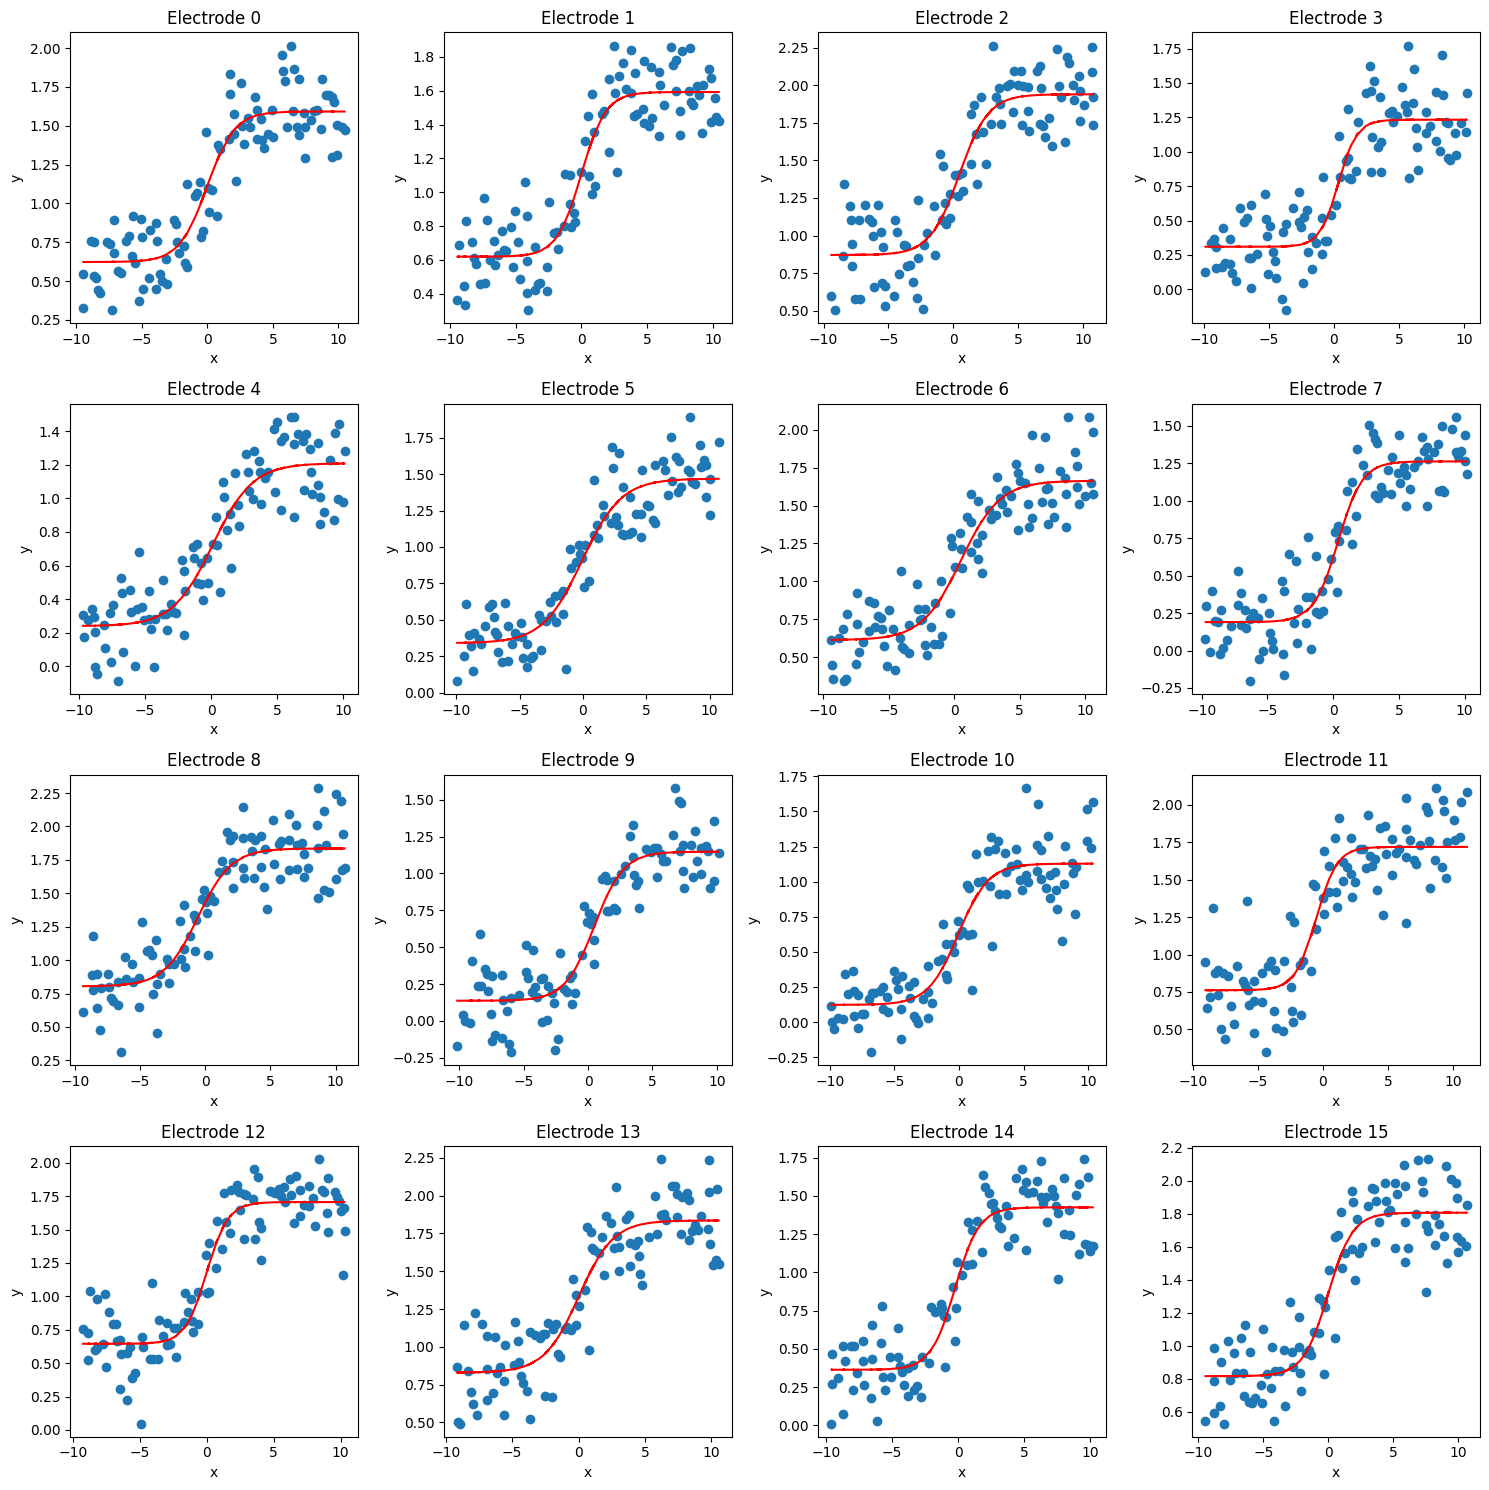

,L,x0,k,b
0,0.968426,-0.024245,0.950483,0.623212
1,0.973932,-0.013752,1.071399,0.618182
2,1.069128,0.449149,0.891710,0.870285
3,0.923089,0.340851,1.400260,0.309769
4,0.970598,0.112167,0.662069,0.238852
5,1.127011,-0.071885,0.646123,0.341209
6,1.051848,0.509873,0.675357,0.612136
7,1.072338,0.366750,1.084511,0.189836
8,1.031680,-0.575120,0.774465,0.803928
9,1.010582,0.479099,0.881951,0.137109


In [8]:
df = electrodePlot()
df

### Trying to fit to Matt's Data

In [9]:
import scipy.io

mattData = scipy.io.loadmat("C:/Users/Jjmas/OneDrive/Desktop/Reseach/Anne/Characterization.mat")

x_data = mattData['x_data']
y_data = mattData['y_data']
pulseWidth = x_data[0][0][0]


In [151]:
def electrodePlotMatt():
    fig, axs = plt.subplots(1,5, figsize= (15,5))
    angles= [ 'Index','MRS','Wrist']
    muscles= ['EDC','FDP','EIP',
             'ECRB', 'FCR' ]
    all_params = []
    for j in range(5):
        for i in range(3):
            # try:
            fit_y, params = fitCurve(pulseWidth,  y_data[j][i].flatten())
            all_params.append(list(params) + [j,i])
            # except:
            # print('Could not fit Line for ' + muscles[j] + ' ' + angles[i])
            axs[j].scatter(pulseWidth, y_data[j][i], label=angles[i])
            axs[j].plot(pulseWidth, fit_y, linestyle = '--')
        axs[j].set_title(muscles[j])
        axs[j].set_xlabel('Pulse Width')
        axs[j].set_ylabel('Angle Change')
    plt.legend()
    fig.suptitle('Electrode Characterization')
    plt.tight_layout()
    plt.show()
    df = pd.DataFrame(all_params, columns = ['L','x0','k','b', 'Muscle', 'Arm'])
    return(df)

C:\Users\Jjmas\AppData\Local\Temp\ipykernel_21412\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


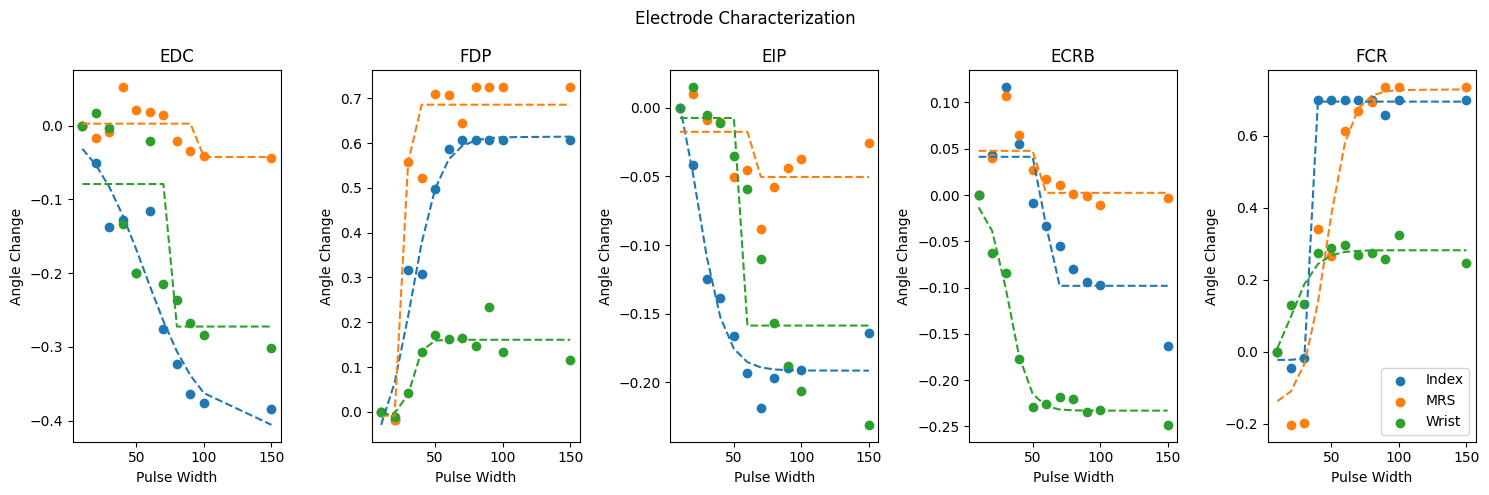

,L,x0,k,b,Muscle,Arm
0,-0.422066,56.373270,0.046981,0.011327,0,0
1,-0.045139,93.583864,60.908073,0.002543,0,1
2,-0.193110,74.864581,60.966773,-0.079286,0,2
3,0.723719,32.314525,0.093241,-0.109434,1,0
4,0.694173,29.132502,1.708981,-0.008621,1,1
5,0.167990,33.546866,0.272341,-0.007193,1,2
6,-0.246089,23.088013,0.099170,0.054725,2,0
7,-0.032878,63.139982,61.000000,-0.017468,2,1
8,-0.151125,57.517192,61.002435,-0.007417,2,2
9,-0.139400,59.997715,60.999957,0.041300,3,0


In [152]:
realParams = electrodePlotMatt()
realParams.describe()
realParams

### Modeling independent electrode interactions and possible angle space

In [178]:
electrodeStates = list(itertools.product([0,1], repeat=5))  # all possible electrode states
electrodeStates 

[(0, 0, 0, 0, 0),
 (0, 0, 0, 0, 1),
 (0, 0, 0, 1, 0),
 (0, 0, 0, 1, 1),
 (0, 0, 1, 0, 0),
 (0, 0, 1, 0, 1),
 (0, 0, 1, 1, 0),
 (0, 0, 1, 1, 1),
 (0, 1, 0, 0, 0),
 (0, 1, 0, 0, 1),
 (0, 1, 0, 1, 0),
 (0, 1, 0, 1, 1),
 (0, 1, 1, 0, 0),
 (0, 1, 1, 0, 1),
 (0, 1, 1, 1, 0),
 (0, 1, 1, 1, 1),
 (1, 0, 0, 0, 0),
 (1, 0, 0, 0, 1),
 (1, 0, 0, 1, 0),
 (1, 0, 0, 1, 1),
 (1, 0, 1, 0, 0),
 (1, 0, 1, 0, 1),
 (1, 0, 1, 1, 0),
 (1, 0, 1, 1, 1),
 (1, 1, 0, 0, 0),
 (1, 1, 0, 0, 1),
 (1, 1, 0, 1, 0),
 (1, 1, 0, 1, 1),
 (1, 1, 1, 0, 0),
 (1, 1, 1, 0, 1),
 (1, 1, 1, 1, 0),
 (1, 1, 1, 1, 1)]

In [179]:
def sigmoidSum(state, realParams):
    for e, is_active in enumerate(state):
        print(e)
        index, mrs, wrist = 0, 0, 0
        # print(e, is_active)
        if (is_active):
            param = realParams[(realParams['Muscle'] == e) & (realParams['Arm'] == 0)].loc[:,['L','x0','k','b']].values[0]
            index+= sigmoid(pulseWidth, *param )
            param = realParams[(realParams['Muscle'] == e) & (realParams['Arm'] == 1)].loc[:,['L','x0','k','b']].values[0]
            mrs+= sigmoid(pulseWidth, *param )
            param = realParams[(realParams['Muscle'] == e) & (realParams['Arm'] == 2)].loc[:,['L','x0','k','b']].values[0]
            wrist+= sigmoid(pulseWidth, *param )
    return index, mrs, wrist

sigmoidSum(electrodeStates[3], realParams)

0
1
2
3
4


C:\Users\Jjmas\AppData\Local\Temp\ipykernel_21412\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_21412\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


(array([-0.02262524, -0.02262524, -0.0184971 ,  0.69553139,  0.69553139,
         0.69553139,  0.69553139,  0.69553139,  0.69553139,  0.69553139,
         0.69553139]),
 array([-0.13733771, -0.11030039, -0.03446482,  0.13607742,  0.38255657,
         0.58006889,  0.67634625,  0.71206505,  0.72393448,  0.72773177,
         0.72947728]),
 array([0.00960865, 0.09731329, 0.18780174, 0.24380062, 0.26832835,
        0.27742626, 0.28058874, 0.28166299, 0.28202503, 0.28214672,
        0.28220797]))

In [177]:
angle_spaces = [sigmoidSum(state, realParams) for state in electrodeStates]
angle_spaces

C:\Users\Jjmas\AppData\Local\Temp\ipykernel_21412\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_21412\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_21412\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_21412\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_21412\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_21412\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_21412\2567883890.py:12: RuntimeWarning: overflow encount

[(0, 0, 0),
 (array([-0.02262524, -0.02262524, -0.0184971 ,  0.69553139,  0.69553139,
          0.69553139,  0.69553139,  0.69553139,  0.69553139,  0.69553139,
          0.69553139]),
  array([-0.13733771, -0.11030039, -0.03446482,  0.13607742,  0.38255657,
          0.58006889,  0.67634625,  0.71206505,  0.72393448,  0.72773177,
          0.72947728]),
  array([0.00960865, 0.09731329, 0.18780174, 0.24380062, 0.26832835,
         0.27742626, 0.28058874, 0.28166299, 0.28202503, 0.28214672,
         0.28220797])),
 (0, 0, 0),
 (array([-0.02262524, -0.02262524, -0.0184971 ,  0.69553139,  0.69553139,
          0.69553139,  0.69553139,  0.69553139,  0.69553139,  0.69553139,
          0.69553139]),
  array([-0.13733771, -0.11030039, -0.03446482,  0.13607742,  0.38255657,
          0.58006889,  0.67634625,  0.71206505,  0.72393448,  0.72773177,
          0.72947728]),
  array([0.00960865, 0.09731329, 0.18780174, 0.24380062, 0.26832835,
         0.27742626, 0.28058874, 0.28166299, 0.28202503, 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

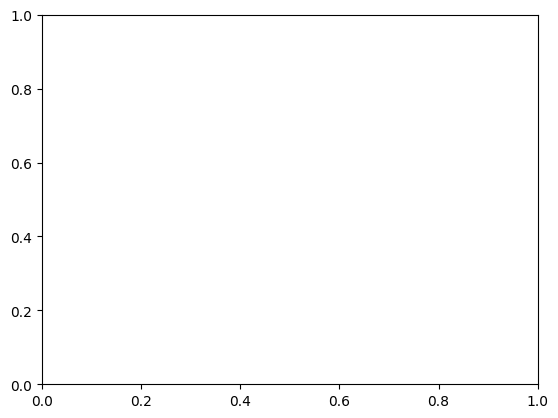

In [169]:
wrist_angles = (angle_spaces[:, 0])  # Extract wrist angles

# Creating the histogram (1D plot) for wrist angles
plt.figure()
plt.hist(wrist_angles, bins=10)  # Adjust bins as needed
plt.xlabel('Wrist Angle')
plt.ylabel('Frequency')
plt.title('Distribution of Achievable Wrist Angles')
plt.show()

In [171]:
wrist_angles[0]

0